## Data Generation

In [1]:
def split_into_nodes(s):
    nodes = ['C', 'G', 'Am', 'F']
    split_nodes = []
    i = 0

    while i < len(s):
        for node in nodes:
            if s[i:].startswith(node):
                split_nodes.append(node)
                i += len(node)
                break

    return split_nodes

In [2]:
sequence = "AmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCFAmGCFAmGCAmGCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCCAmGCC"

In [3]:
nodes_sequence = split_into_nodes(sequence)

three_node_sequences = [''.join(nodes_sequence[i:i+3]) for i in range(len(nodes_sequence) - 2)]

# three_node_sequences

In [4]:
import pandas as pd
matrix_1 = pd.read_csv('/Users/judyz/Downloads/168 Project/all_too_well.csv', header=0)
matrix_1.set_index(matrix_1.columns[0], inplace=True)

## wasserstein distance (earth mover)

In [5]:
from scipy.stats import wasserstein_distance
import pandas as pd

# Remove labels and normalize
def preprocess_matrix(matrix):
    numerical_matrix = matrix.iloc[1:, 1:].astype(float)
    flat_matrix = numerical_matrix.values.flatten()
    flat_matrix /= flat_matrix.sum()
    return flat_matrix

matrix_1 = pd.read_csv('/Users/judyz/Downloads/168 Project/all_too_well.csv', header=None)
matrix_2 = pd.read_csv('/Users/judyz/Downloads/168 Project/baby.csv', header=None)
matrix_3 = pd.read_csv('/Users/judyz/Downloads/168 Project/yellow.csv', header=None)
matrix_4 = pd.read_csv('/Users/judyz/Downloads/168 Project/story_of_my_life.csv', header=None)
matrix_5 = pd.read_csv('/Users/judyz/Downloads/168 Project/hey_soul_sister.csv', header=None)
matrix_6 = pd.read_csv('/Users/judyz/Downloads/168 Project/riptide.csv', header=None)

matrices = [matrix_1, matrix_2, matrix_3, matrix_4, matrix_5, matrix_6]

# Preprocess all matrices
preprocessed_matrices = [preprocess_matrix(m) for m in matrices]

n = len(preprocessed_matrices)
result_matrix = pd.DataFrame(index=range(1, n+1), columns=range(1, n+1))

for i in range(n):
    for j in range(n):
        if i == j:
            result_matrix.iloc[i, j] = 0
        else:
            result_matrix.iloc[i, j] = wasserstein_distance(preprocessed_matrices[i], preprocessed_matrices[j])
            
result_matrix

,1,2,3,4,5,6
1,0,0.000058,0.000208,0.000251,0.000263,0.000033
2,0.000058,0,0.000261,0.000309,0.000321,0.000033
3,0.000208,0.000261,0,0.000096,0.000104,0.000229
4,0.000251,0.000309,0.000096,0,0.000043,0.000276
5,0.000263,0.000321,0.000104,0.000043,0,0.000288
6,0.000033,0.000033,0.000229,0.000276,0.000288,0


## dendrogram based on the similarity matrix

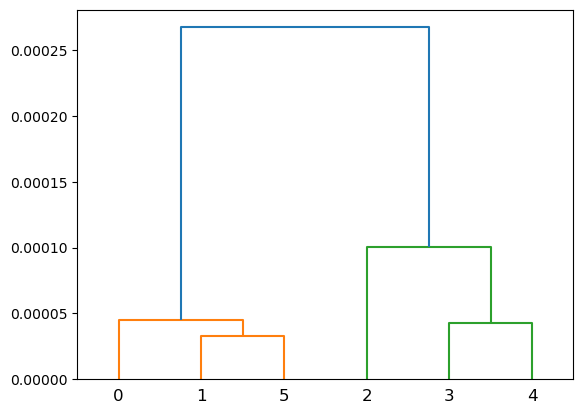

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

condensed_matrix = hierarchy.distance.squareform(result_matrix)

# Perform hierarchical clustering using the condensed distance matrix
Z = hierarchy.linkage(condensed_matrix, 'average')

plt.figure()
dn = hierarchy.dendrogram(Z)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

condensed_matrix = hierarchy.distance.squareform(result_matrix)

# Perform hierarchical clustering using the condensed distance matrix
Z = hierarchy.linkage(condensed_matrix, 'average')

# Set the labels
labels = ["All Too Well", "Baby", "Yellow", "Story of My Life", "Hey Soul Sister", "Riptide"]

fig, ax = plt.subplots(figsize=(10, 8))
dendrogram(Z, labels=labels, ax=ax, leaf_rotation=90)

plt.show()

## matrix multiplication

In [ ]:
matrix_1 = pd.read_csv('/Users/judyz/Downloads/168 Project/all_too_well.csv', header=None)
matrix_2 = pd.read_csv('/Users/judyz/Downloads/168 Project/baby.csv', header=None)
matrix_3 = pd.read_csv('/Users/judyz/Downloads/168 Project/yellow.csv', header=None)
matrix_4 = pd.read_csv('/Users/judyz/Downloads/168 Project/story_of_my_life.csv', header=None)
matrix_5 = pd.read_csv('/Users/judyz/Downloads/168 Project/hey_soul_sister.csv', header=None)
matrix_6 = pd.read_csv('/Users/judyz/Downloads/168 Project/riptide.csv', header=None)

In [ ]:
import numpy as np
import pandas as pd

normalized_matrix_1 = pd.read_csv('/Users/judyz/Downloads/168 Project/Normalized Matrix/normalized_all_too_well.csv', header=None)
normalized_matrix_2 = pd.read_csv('/Users/judyz/Downloads/168 Project/Normalized Matrix/normalized_baby.csv', header=None)
normalized_matrix_3 = pd.read_csv('/Users/judyz/Downloads/168 Project/Normalized Matrix/normalized_yellow.csv', header=None)
normalized_matrix_4 = pd.read_csv('/Users/judyz/Downloads/168 Project/Normalized Matrix/normalized_story_of_my_life.csv', header=None)
normalized_matrix_5 = pd.read_csv('/Users/judyz/Downloads/168 Project/Normalized Matrix/normalized_hey_soul_sister.csv', header=None)
normalized_matrix_6 = pd.read_csv('/Users/judyz/Downloads/168 Project/Normalized Matrix/normalized_riptide.csv', header=None)

matrices = [normalized_matrix_1, normalized_matrix_2, normalized_matrix_3, normalized_matrix_4, normalized_matrix_5, normalized_matrix_6]

def preprocess_matrix(matrix):
    numerical_matrix = matrix.iloc[1:, 1:].astype(float)
    return numerical_matrix

preprocessed_matrices = [preprocess_matrix(m) for m in matrices]

# Multiply two matrices
def multiply_matrices(m1, m2):
    return np.dot(m1, m2)

# Iterate over each unique pair of matrices and multiply them in both orders
for i in range(len(preprocessed_matrices)):
    for j in range(i+1, len(preprocessed_matrices)):
        # Multiply matrices in one order
        product_matrix_ij = multiply_matrices(preprocessed_matrices[i].values, preprocessed_matrices[j].values)
        product_df_ij = pd.DataFrame(product_matrix_ij)
        filename_ij = f'matrix_{i+1}_x_matrix_{j+1}.csv'
        product_df_ij.to_csv(filename_ij, header=None, index=None)
        print(f'Saved multiplication of matrix {i+1} and matrix {j+1} to {filename_ij}')

        # Multiply matrices in reverse order
        product_matrix_ji = multiply_matrices(preprocessed_matrices[j].values, preprocessed_matrices[i].values)
        product_df_ji = pd.DataFrame(product_matrix_ji)
        filename_ji = f'matrix_{j+1}_x_matrix_{i+1}.csv'
        product_df_ji.to_csv(filename_ji, header=None, index=None)
        print(f'Saved multiplication of matrix {j+1} and matrix {i+1} to {filename_ji}')

## generation of music

In [ ]:
transformed_matrix_1 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_all_too_well.csv', header=None)
transformed_matrix_2 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_baby.csv', header=None)
transformed_matrix_3 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_yellow.csv', header=None)
transformed_matrix_4 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_story_of_my_life.csv', header=None)
transformed_matrix_5 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_hey_soul_sister.csv', header=None)
transformed_matrix_6 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_riptide.csv', header=None)

In [ ]:
import pandas as pd

transformed_matrix_1 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_all_too_well.csv', header=None)
transformed_matrix_2 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_baby.csv', header=None)
transformed_matrix_3 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_yellow.csv', header=None)
transformed_matrix_4 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_story_of_my_life.csv', header=None)
transformed_matrix_5 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_hey_soul_sister.csv', header=None)
transformed_matrix_6 = pd.read_csv('/Users/judyz/Downloads/168 Project/Transition Matrix/transformed_riptide.csv', header=None)

matrices = [transformed_matrix_1, transformed_matrix_2,
            transformed_matrix_3, transformed_matrix_4,
            transformed_matrix_5, transformed_matrix_6]

def preprocess_matrix(matrix):
    numerical_matrix = matrix.iloc[1:, 1:].astype(float)
    return numerical_matrix

preprocessed_matrices = [preprocess_matrix(m) for m in matrices]

# Calculate the average matrix
average_matrix = sum(preprocessed_matrices) / len(preprocessed_matrices)

# print(average_matrix)

# Save
average_matrix.to_csv('/Users/judyz/Downloads/168 Project/average_matrix.csv', index=False, header=False)

## generating walk

In [ ]:
import pandas as pd
import numpy as np

def load_and_normalize_matrix(file_path):
    transition_matrix = pd.read_csv(file_path, index_col=0)

    # Normalize the transition matrix so that each row sums to 1
    normalized_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Fix rows that sum to 0 by setting their diagonal to 1 (self-transition)
    zero_sum_rows = normalized_matrix.sum(axis=1) == 0
    normalized_matrix.loc[zero_sum_rows, zero_sum_rows.index] = 1

    return normalized_matrix

def simulate_markov_walk(transition_matrix, start_node, steps):
    current_state = start_node
    walk = [current_state]

    for _ in range(steps):
        probabilities = transition_matrix.loc[current_state]
        next_state = np.random.choice(transition_matrix.columns, p=probabilities)
        walk.append(next_state)
        current_state = next_state

    return walk

file_path = '/Users/judyz/Downloads/168 Project/average_matrix.csv'

normalized_transition_matrix = load_and_normalize_matrix(file_path)

walk = simulate_markov_walk(normalized_transition_matrix, 'FCG', 100)
#print(walk)

normalized_transition_matrix.to_csv('/Users/judyz/Downloads/168 Project/normalized_matrix.csv', index=False, header=False)

In [ ]:
filtered_walk_elements = ''.join([node for index, node in enumerate(walk) if index % 3 == 0])

filtered_walk_elements

In [ ]:
import pandas as pd
import numpy as np
import random

random.seed(69)

def load_and_normalize_matrix(file_path):
    transition_matrix = pd.read_csv(file_path, index_col=0)

    # Normalize the transition matrix so that each row sums to 1
    normalized_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Fix rows that sum to 0 by setting their diagonal to 1 (self-transition)
    zero_sum_rows = normalized_matrix.sum(axis=1) == 0
    normalized_matrix.loc[zero_sum_rows, zero_sum_rows.index] = 1

    return normalized_matrix

def simulate_markov_walk(transition_matrix, start_node, steps):
    current_state = start_node
    walk = [current_state]

    for _ in range(steps):
        probabilities = transition_matrix.loc[current_state]
        next_state = np.random.choice(transition_matrix.columns, p=probabilities)
        walk.append(next_state)
        current_state = next_state

    return walk

file_path = '/Users/judyz/Downloads/168 Project/average_matrix.csv'

normalized_transition_matrix = load_and_normalize_matrix(file_path)

walk = simulate_markov_walk(normalized_transition_matrix, 'FCG', 30)
# print(walk)

normalized_transition_matrix.to_csv('/Users/judyz/Downloads/168 Project/normalized_matrix.csv', index=False, header=False)

In [ ]:
filtered_walk_elements = ''.join([node for index, node in enumerate(walk) if index % 3 == 0])

filtered_walk_elements